## Machine Learning II Homework

In this homework, we're going to compare the results of an Support Vector Machine (SVN) classifier with those of a Gaussian Naive Bayes (GNB) classifier on the same data.

### First, we'll make the data set.

In [1]:
from sklearn.datasets import make_blobs

In [78]:
this_seed = 40 # Set the seed so we can play with it
# Create two 2D blobs of data
X, y = make_blobs(n_samples=300, centers=2, 
                  random_state=this_seed, cluster_std=3.14)

Now, let's take a look at it to see what we're dealing with.

In [79]:
from matplotlib import pyplot as plt

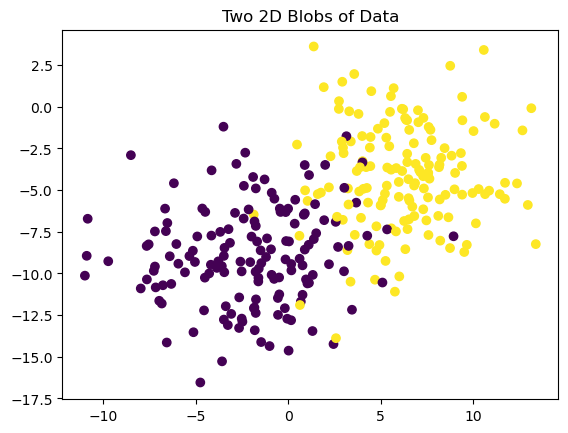

In [80]:
# Plot the blobs of data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Two 2D Blobs of Data")
plt.show()

Later, we'll re-run everything using different seeds. Make note of this scatter plot each time, and make a guess as how well the classifiers will do.

---

### Split the data

First, split the data into training and test subsets. Make it a 70/30 training/test split, and set the `random_state` to 42. We'll use the exact same split for both classifiers to make the comparison fair.

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

___

### Classify the data using an SVM classifier

In [83]:
from sklearn.svm import SVC

Make and fit the model:

In [84]:
# Create a Support Vector Machine (SVM) classifier and train it on the training data
svm = SVC(kernel='linear', C=1)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

Predict the test data:

In [85]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

---

### Classify the data using an GNB classifier

In [86]:
from sklearn.naive_bayes import GaussianNB

Make and fit the model:

In [87]:
# Create a Naive Bayes classifier and train it on the PCA-transformed training data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)

gnb = GaussianNB()

gnb.fit(X_train_gnb, y_train_gnb)

GaussianNB()

Predict the test data:

In [88]:
# Make predictions on the PCA-transformed testing data
y_pred_gnb = gnb.predict(X_test_gnb)

---

### Look at the confusion matrixes for the two classifiers

In [89]:
from sklearn.metrics import confusion_matrix

Compute and print the SVM confusion matrix:

In [90]:
# Compute and print the svm confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[37  4]
 [ 5 44]]


Compute and print the GNB confusion matrix:

In [91]:
# Compute and print the gnb confusion matrix
conf_matrix_gnb = confusion_matrix(y_test_gnb, y_pred_gnb)
print(conf_matrix_gnb)

[[37  4]
 [ 4 45]]


---

### Let's play

Re-run the above for several different seeds (including 11). *No need to print them or write them down*, just get a feel for what's going on. In the cell below briefly describe how the two classifiers compare across different data sets.

**The two classifers produce similar predictions across different data sets. The confusion matrices produced by the two classifers are often the same or only one false positive value apart.**

How do you expect the classifiers to perform with much larger and smaller blob sizes (larger `cluster_std`)? 

**I would expect the two classifers to perform similarly with much larger and smaller blob sizes.**

Print out an example confusion matrix from a large and small blob size (from either classifier) below.

### SVM classifer:

In [103]:
# large  blob size
X, y = make_blobs(n_samples=300, centers=2, 
                  random_state=this_seed, cluster_std= 20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

svm = SVC(kernel='linear', C=1)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[25 16]
 [17 32]]


In [104]:
# small blob size
X, y = make_blobs(n_samples=300, centers=2, 
                  random_state=this_seed, cluster_std= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

svm = SVC(kernel='linear', C=1)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[41  0]
 [ 0 49]]


### GNB classifer:

In [105]:
# large blob size
X, y = make_blobs(n_samples=300, centers=2, 
                  random_state=this_seed, cluster_std= 20)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

conf_matrix_gnb = confusion_matrix(y_test, y_pred)
print(conf_matrix_gnb)

[[25 16]
 [19 30]]


In [106]:
# small blob size
X, y = make_blobs(n_samples=300, centers=2, 
                  random_state=this_seed, cluster_std= 1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

conf_matrix_gnb = confusion_matrix(y_test, y_pred)
print(conf_matrix_gnb)

[[41  0]
 [ 0 49]]
